In [ ]:
from pathlib import Path
from typing import List, Set

In [ ]:
import editdistance
import jellyfish
import re
import math
import codecs
import random
import time
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import NearestNeighbors
from collections import Counter
from collections import defaultdict
from functools import lru_cache

### Поготовим данные

In [ ]:
words_path = Path("/content/words2.txt")
broken_texts_path = Path("/content/broken_texts.csv")
correct_texts_path = Path("/content/derived.csv")

In [ ]:
df = pd.read_csv(broken_texts_path)

In [ ]:
df.head()

,id,text
0,0,не обнаруживается различий в общем объеме серо...
1,1,"интегумент ( от - покрывало , покров ) - терми..."
2,2,"22 июня 2013 года решениме большинстав судей ,..."
3,3,в 1987 mi выпустила альбом all the best !
4,4,путевая машинная станция 79 была создана 16 фе...


In [ ]:
texts = df["text"].tolist()

In [ ]:
with open(words_path, 'r') as f:
  words_list = sorted(set(word.strip() for word in f.readlines()))

In [ ]:
words_list[::20000]

['!',
 'daewoo',
 'агенобарб',
 'биотопа',
 'восхитительный',
 'дебальцево',
 'зафрахтованные',
 'километровой',
 'лесными',
 'московщина',
 'овдовевшего',
 'пионер-11',
 'провозглашавшая',
 'рыжиков',
 'спокоен',
 'тэйна',
 'хэй']

In [ ]:
corrected_df = pd.read_csv(correct_texts_path)

In [ ]:
corrected_df.shape

(20000, 2)

In [ ]:
corrected_df.head()

,id,text
0,0,не обнаруживается различий в общем объеме серо...
1,1,"интегумент ( от - покрывало , покров ) - терми..."
2,2,"22 июня 2013 года решением большинства судей ,..."
3,3,в 1987 emi выпустила альбом all the best !
4,4,путевая машинная станция 79 была создана 16 фе...


### Изучим некоторые трюки SpellChecker на основе его компонент

Инвертированный индекс

In [ ]:
class SimpleSpeller:
    """
    Поиск слов, наиболее близких по числу общих n-грамм и
    последующее ранжирование по эвристике-близости
    """

    def __init__(self, n_candidates_search=20):
        """
        :param n_candidates_search: число кандидатов-строк при поиске
        """
        self.n_candidates = n_candidates_search

        self.vectorizer = CountVectorizer(analyzer="char_wb", ngram_range=(2, 2), binary=True)
        self.index = defaultdict(set)

    def fit(self, words_list):
        """
        Подгонка спеллера
        :param words_list: наш словарь
        """

        checkpoint = time.time()
        self.words_list = words_list

        encoded_words = self.vectorizer.fit_transform(words_list).tocoo()

        # строим словарь, отображающий идентификатор нграммы в множество термов
        for i in zip(encoded_words.row, encoded_words.col):
            self.index[i[1]].add(i[0])

        print("Speller fitted in", time.time() - checkpoint)

        return self

    def predict(self, word: str) -> str:
        # TODO
        # 1. Отобрать наиболее подходящие слова-кандидаты, пользуясь инвертированным индексом
        suggests = self.__get_candidates(word)

        # 2. Отобрать наиболее близкие ответы, пользуясь редакционным расстоянием
        closest_word = ''
        return closest_word

    def __get_candidates(self, word: str) -> List[str]:
        """
        Отбираем наиболее подходящих кандидатов с помощью нграм битого слова
        :param word: битое слово
        :return candidates список слов из словаря
        """

        candidates = []
        # TODO
        # требуется пройтись по нграмам входного слова и найти по ним в индексе подходящих кандидатов
        # для подсчёта слов здесь удобнее всего использовать Counter
        return candidates

In [ ]:
class Rectifier:
    def __init__(self, words: Set[str], speller: Speller):
        self._words = words
        self._speller = speller

    def rectify(self, data: List[str]) -> List[str]:
        """
        Напишите функцию, которая возвращает исправленные тексты
        :param data: список битых строк
        : return corrected список исправленных строк
        """
        # сделаем допущение, что длины списков с токенами в data совпадают с длинами финальных списков из corrected 
        corrected = []
        # YOUR CODE HERE
        return corrected


In [ ]:
def mesure_metric(gt: List[str], broken: List[str], corrected: List[str]) -> float:
    all_tokens = 0
    correct = 0
    for gt_sentence, broken_sentence, corrected_sentence in zip(gt, broken, corrected):
        for gt_token, broken_token, corrected_token in zip(gt_sentence.split(), broken_sentence.split(), corrected_sentence.split()):
            if gt_token != broken_token:
                all_tokens += 1
                if gt_token == corrected_token:
                    correct += 1
    return correct / all_tokens

In [ ]:
gt = corrected_df['text']

In [ ]:
rectifier = Rectifier(set(words_list), SimpleSpeller().fit(words_list))

In [ ]:
corrected_text = rectifier.rectify(texts)

In [ ]:
mesure_metric(gt, texts, corrected_text)

#### Какие бывают метрики?

In [ ]:
import editdistance
import jellyfish
import re
import math
import codecs
import random
import time
import numpy as np
import pandas as pd

In [ ]:
a, b = 'машина', 'калина'

In [ ]:
jellyfish.hamming_distance(a, b)

2

Расстояние Левенштейна

Проверим то, что расстояние Левенштейна действительно является метрикой :)

In [ ]:
editdistance.eval(a, b)

2

In [ ]:
editdistance.eval(a, a)

0

In [ ]:
editdistance.eval(a, b) == editdistance.eval(b, a)

True

In [ ]:
c = 'малина'

In [ ]:
editdistance.eval(a, b), editdistance.eval(a, c) + editdistance.eval(c, b)

(2, 2)

In [ ]:
editdistance.eval(a, b) <= editdistance.eval(a, c) + editdistance.eval(c, b)

True

Аксиомы метрики проверены!

NB! Модификация этого расстояния (Дамерау-Левенштейна) может нарушить неравенство треугольника!

In [ ]:
from pyxdameraulevenshtein import damerau_levenshtein_distance

In [ ]:
a, b, c = 'ca', 'ac', 'abc'

In [ ]:
damerau_levenshtein_distance(a, b), damerau_levenshtein_distance(b, c)

(1, 1)

In [ ]:
damerau_levenshtein_distance(a, c)

3

In [ ]:
damerau_levenshtein_distance(a, c) <= damerau_levenshtein_distance(a, b) + damerau_levenshtein_distance(c, b)

False

In [ ]:
print(jellyfish.levenshtein_distance(u'jellyfish', u'jellyfihs'))
print(jellyfish.damerau_levenshtein_distance(u'jellyfish', u'jellyfihs'))

2
1


#### BK-деревья

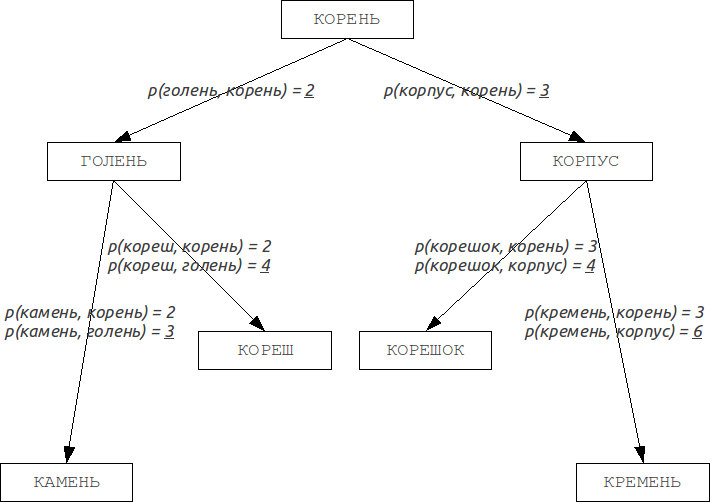

BK-дерево определяется следующим образом. В качестве корневого узла выбирается произвольный элемент a. У корневого узла может быть ноль или более поддеревьев. K-е поддерево рекурсивно строится из всех элементов b, таких что: 
$$ \displaystyle d (a, b) = k. $$

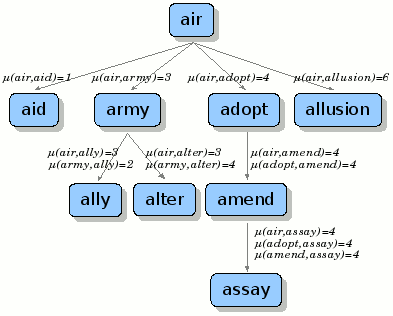

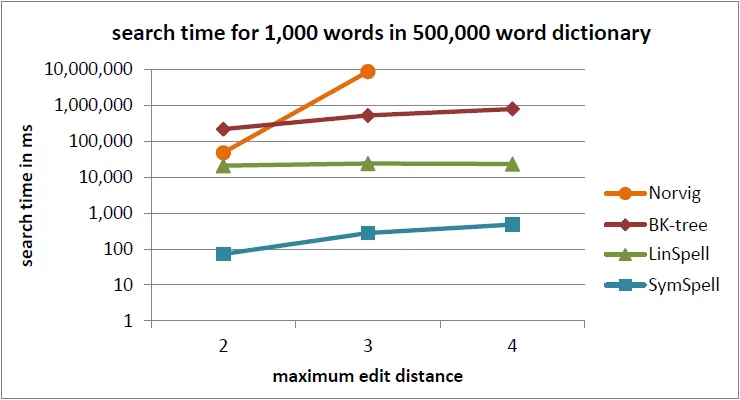

Где найти BK-дерево в Python?

In [ ]:
import pybktree

In [ ]:
class SimpleSpellerBkTree:
    """
    Поиск слов, наиболее близких по числу общих n-грамм и
    последующее ранжирование по эвристике-близости
    с использованием BK-tree
    """

    def __init__(self, n_candidates_search=20):
        """
        :param n_candidates_search: число кандидатов-строк при поиске
        """
        self.n_candidates = n_candidates_search

    def fit(self, words_list):
        """
        Подгонка спеллера
        :param words_list: словарь
        """

        checkpoint = time.time()

        self.words_list = pybktree.BKTree(editdistance.eval, words_list)

        # строим словарь на базе BKTree

        print("Speller fitted in", time.time() - checkpoint)

        return self

    def predict(self, word: str) -> str:
        suggests = self.__get_candidates(word)

        closest_word = ''
        # TODO
        return closest_word

    def __get_candidates(self, word: str) -> List[str]:
        """
        Отбираем наиболее подходящих кандидатов с помощью BK-дерева
        :param word: битое слово
        :return candidates список слов из словаря
        """
        return sorted(self.words_list.find(word, 7))

In [ ]:
rectifier = Rectifier(set(words_list), SimpleSpellerBkTree().fit(words_list))

In [ ]:
corrected_text = rectifier.rectify(texts)

In [ ]:
mesure_metric(gt, texts, corrected_text)

Trie, префиксные деревья

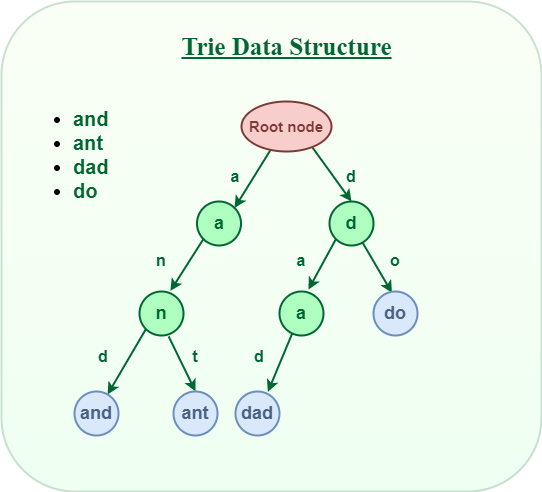

Например, в Trie можно хранить наш словарь, или список возможных кандидатов для слова..

In [ ]:
from sortedcontainers import SortedDict, SortedListWithKey
from typing import List, Optional


class SpellingLevensteinTree:
    __END = 'is_leaf'

    def __init__(self, use_damerau_modification=False):
        """
        Инициализация trie
        :param use_damerau_modification Используем метрику Дамерау-Левенштейна distance или обычное расстояние Девенштейна
        """
        self.root = SortedDict()
        self.use_damerau_modification = use_damerau_modification

    @staticmethod
    def __get_row_len(word: str) -> int:
        return len(word) + 1

    def __add(self, word: str) -> None:
        """
        Добавляем слово в префиксное дерево
        :param word строка
        :return
        """
        # YOUR CODE HERE

    def build_dict(self, words: List[str]) -> None:
        """
        Строим префиесное дерево на основе нашего словаря
        :param words список корректных слов
        :return
        """
        for word in words:
            self.__add(word)

    def search(self, word: str, distance=0) -> SortedListWithKey:
        """
        Возвращаем наиболее подходящих кандидатов, чьё расстояние не больше заданного параметра
        :param word битое слово
        :param distance максимальный порог по отбору кандидатов
        :return candidates список пар (слово, расстояние)
        """
        candidates = SortedListWithKey(key=lambda x: x[::-1])
        stack = [(children, [letter], None, [*range(self.__get_row_len(word))])
                 for letter, children in self.root.items()]

        while stack:
            node, prefix, pre_prev_row, prev_row = stack.pop()
            curr_row, min_dist = self.__calculate_distance(word, prefix, pre_prev_row, prev_row)

            if min_dist > distance:
                continue

            if curr_row[-1] <= distance and self.__END in node:
                candidates.add((''.join(prefix), curr_row[-1]))

            stack.extend(
                (children, prefix + [letter], prev_row if self.use_damerau_modification else None, curr_row)
                for letter, children in node.items() if letter != self.__END
            )

        return candidates

    def __calculate_distance(self, word: str, prefix: List[str],
                             pre_prev_row: Optional[List[int]], prev_row: List[int]):
        """
        Считаем расстояние Левенштейна (модификацию расстояния) для битого слова и префикса, собранного по дереву от корня по текущий узел,
        :param word битое слово
        :param prefix текущий префикс от корня по текущий узел дерева
        :param pre_prev_row Массив для модификационного расстояния
        :param prev_row первый массив для расстояния Левенштейна
        :return curr_row, min_dist текущий ряд для расстояния Левенштейна и минимальное из расстояний
        """
        curr_row = [prev_row[0] + 1]
        min_dist = curr_row[0]
        for i in range(1, self.__get_row_len(word)):
            curr_row.append(min(
                curr_row[-1] + 1,
                prev_row[i] + 1,
                prev_row[i - 1] + (word[i - 1] != prefix[-1])
            ))

            if self.use_damerau_modification:
                if len(prefix) > 1 and i >= 1 and word[i - 1] == prefix[-2] and \
                        word[i - 1] != prefix[-1] and word[i - 2] == prefix[-1]:
                    curr_row[-1] = min(curr_row[-1], pre_prev_row[i - 2] + 1)

            min_dist = min(min_dist, curr_row[-1])
        return curr_row, min_dist

In [ ]:
# Test standard Levenstein Trie
dictionary = SpellingLevensteinTree()
dictionary.build_dict(['hello', 'hallo', 'leetcode', 'hell'])

print(dictionary.search('hello'))

print(dictionary.search('ehllo', 2))
print(dictionary.search('leetcdoe', 2))
print(dictionary.search('eletcode', 2))

In [ ]:
# Test Damerau-Levenstein Trie
dictionary = SpellingLevensteinTree(use_damerau_modification=True)
dictionary.build_dict(['hello', 'hallo', 'leetcode', 'hell'])

print(dictionary.search('ehllo', 2))
print(dictionary.search('leetcdoe', 2))
print(dictionary.search('eletcode', 2))

Где ещё применяется нечёткий поиск?

В таких случаях бывают полезны фонетические алгоритмы. Наиболее популярные из них: Soundex и Metaphone


In [ ]:
jellyfish.soundex('Klumpz'), jellyfish.soundex('Clumps')

('K451', 'C451')

In [ ]:
jellyfish.metaphone('Klumpz'), jellyfish.metaphone('Clumps')

('KLMPS', 'KLMPS')

In [ ]:
import fonetika
from fonetika.soundex import RussianSoundex

In [ ]:
soundex = RussianSoundex(delete_first_letter=True)
soundex.transform('ёлочка')

'J070530'

In [ ]:
soundex = RussianSoundex(delete_first_letter=True, delete_zeros=True)
soundex.transform('ёлочка')

'J753'

In [ ]:
from fonetika.metaphone import RussianMetaphone

In [ ]:
metaphone = RussianMetaphone()
metaphone.transform('ёлочка')

'JАЛАЧКА'